# Apartement Rent Data
Dataset source: https://www.kaggle.com/datasets/shashanks1202/apartment-rent-data/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split

import re

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load data

In [5]:
df = pd.read_csv('../../Datasets/Apartement Rent Data/apartments_for_rent_classified_100K/apartments_for_rent_classified_100K.csv',
                 sep=';',
                 encoding='cp1252',
                low_memory=False)

In [6]:
df.drop(['time','price_display'],axis=1,inplace=True)

In [7]:
df.shape

(99492, 20)

In [8]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [9]:
train,test = train_test_split(df,shuffle=True,test_size=0.1,random_state=42)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('price',axis=1),
                                                 train['price'],
                                                shuffle=True,
                                                test_size=0.2,
                                                random_state=42)

# Data Preprocessing

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89541 entries, 16265 to 15796
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            89541 non-null  int64  
 1   category      89541 non-null  object 
 2   title         89541 non-null  object 
 3   body          89541 non-null  object 
 4   amenities     75093 non-null  object 
 5   bathrooms     89485 non-null  float64
 6   bedrooms      89425 non-null  float64
 7   currency      89541 non-null  object 
 8   fee           89541 non-null  object 
 9   has_photo     89541 non-null  object 
 10  pets_allowed  35251 non-null  object 
 11  price         89541 non-null  float64
 12  price_type    89541 non-null  object 
 13  square_feet   89541 non-null  int64  
 14  address       7147 non-null   object 
 15  cityname      89265 non-null  object 
 16  state         89265 non-null  object 
 17  latitude      89518 non-null  float64
 18  longitude     89518 non-nul

## Handling Missing Data

In [14]:
def extract_address(address):
    return re.sub(r'^\d* ','',address)

In [15]:
address_dict = X_train.address.dropna().apply(extract_address).value_counts().to_dict()

In [16]:
na_mean = train.isna().mean()
na_cat = na_mean[na_mean > 0]

In [17]:
na_cat

amenities       0.161356
bathrooms       0.000625
bedrooms        0.001295
pets_allowed    0.606314
address         0.920182
cityname        0.003082
state           0.003082
latitude        0.000257
longitude       0.000257
dtype: float64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'square_feet'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

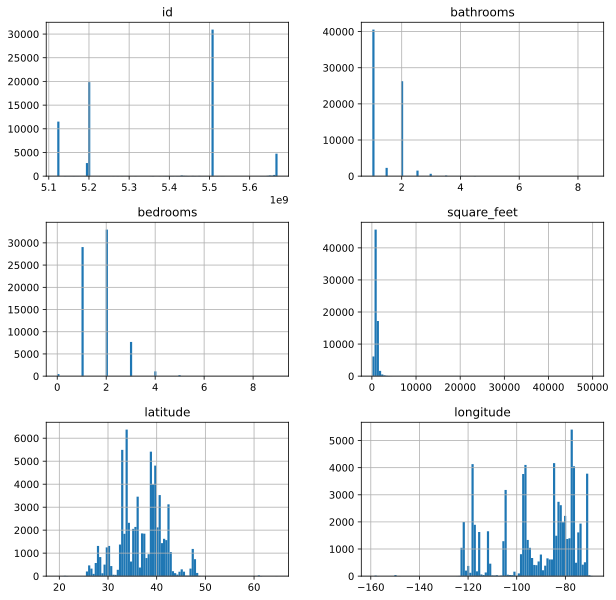

In [18]:
X_train.select_dtypes(include='number').hist(bins=100,figsize=(10,10))

In [19]:
feature_numerical = list(set(X_train.select_dtypes(include='number').columns) - {'latitude','longitude','id'})
feature_categorical = list(list(X_train.select_dtypes(exclude='number').columns) + ['latitude','longitude'])

In [20]:
preprocessor = ColumnTransformer(
    transformers=(
        ('numeric_imputer', SimpleImputer(strategy='median',add_indicator=True),feature_numerical),
        ('categorical_imputer',SimpleImputer(strategy='most_frequent',add_indicator=True),feature_categorical)
    ),
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [21]:
df.select_dtypes(include='number').columns

Index(['id', 'bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude',
       'longitude'],
      dtype='object')

In [22]:
feature_categorical

['category',
 'title',
 'body',
 'amenities',
 'currency',
 'fee',
 'has_photo',
 'pets_allowed',
 'price_type',
 'address',
 'cityname',
 'state',
 'source',
 'latitude',
 'longitude']

In [23]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['bathrooms', 'bedrooms', 'square_feet']),
                                ('categorical_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['category', 'title', 'body', 'amenities',
                                  'currency', 'fee', 'has_photo',
                                  'pets_allowed', 'price_type', 'address',
                                  'cityname', 'state', 'source', 'latitude',
                                  'longitude'])),
                  verbose_feature_names_out=False)

In [24]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=(('numeric_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['bathrooms', 'bedrooms', 'square_feet']),
                                ('categorical_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['category', 'title', 'body', 'amenities',
                                  'currency', 'fee', 'has_photo',
                                  'pets_allowed', 'price_type', 'address',
                                  'cityname', 'state', 'source', 'latitude',
                                  'longitude'])),
                  verbose_feature_names_out=False)

In [25]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [26]:
X_train.shape,X_test.shape

((71632, 28), (17909, 28))

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms                      71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   square_feet                    71632 non-null  float64
 3   missingindicator_bathrooms     71632 non-null  float64
 4   missingindicator_bedrooms      71632 non-null  float64
 5   category                       71632 non-null  object 
 6   title                          71632 non-null  object 
 7   body                           71632 non-null  object 
 8   amenities                      71632 non-null  object 
 9   currency                       71632 non-null  object 
 10  fee                            71632 non-null  object 
 11  has_photo                      71632 non-null  object 
 12  pets_allowed                   71632 non-null  

## Id

In [29]:
X_train.drop('id',axis=1,inplace=True)

In [30]:
X_test.drop('id',axis=1,inplace=True)

## Category

In [32]:
unique_categories = df.category.unique()

In [33]:
all_categories = []
for categories in unique_categories:
    categories = categories.split('/')
    for c in categories:
        all_categories.append(c)

In [34]:
all_categories

['housing',
 'rent',
 'apartment',
 'housing',
 'rent',
 'home',
 'housing',
 'rent',
 'short_term',
 'housing',
 'rent',
 'housing',
 'rent',
 'condo',
 'housing',
 'rent',
 'other',
 'housing',
 'rent',
 'commercial',
 'retail']

In [35]:
unique_categories = list(set(all_categories))

In [36]:
unique_categories

['short_term',
 'retail',
 'other',
 'home',
 'rent',
 'commercial',
 'housing',
 'condo',
 'apartment']

In [37]:
def encode_category(df):
    for i in unique_categories:
        df[f'cat_{i}'] = df.category.apply(lambda x : 1 if i in x else 0)
    df.drop('category',axis=1,inplace=True)
    return df

In [38]:
X_train = encode_category(X_train)

In [39]:
X_test = encode_category(X_test)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms                      71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   square_feet                    71632 non-null  float64
 3   missingindicator_bathrooms     71632 non-null  float64
 4   missingindicator_bedrooms      71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   amenities                      71632 non-null  object 
 8   currency                       71632 non-null  object 
 9   fee                            71632 non-null  object 
 10  has_photo                      71632 non-null  object 
 11  pets_allowed                   71632 non-null  object 
 12  price_type                     71632 non-null  

## Amenities

In [42]:
unique_amenities = X_train.amenities.unique()

In [43]:
unique_amenities

array(['Parking', 'Basketball,Pool,Tennis,Washer Dryer',
       'Fireplace,Parking,Patio/Deck,Wood Floors', ...,
       'Gated,Parking,Patio/Deck,Playground',
       'Fireplace,Gym,Patio/Deck,Playground,Tennis',
       'AC,Gated,Patio/Deck,View,Washer Dryer'], dtype=object)

In [44]:
all_amenities = []
for amenities in unique_amenities:
    amenities = amenities.split(',')
    for a in amenities:
        all_amenities.append(a)

In [45]:
unique_amenities = list(set(all_amenities))

In [46]:
unique_amenities

['AC',
 'Playground',
 'Refrigerator',
 'Hot Tub',
 'Parking',
 'Fireplace',
 'Patio/Deck',
 'Wood Floors',
 'Pool',
 'Golf',
 'Gated',
 'View',
 'Alarm',
 'Clubhouse',
 'Elevator',
 'TV',
 'Luxury',
 'Internet Access',
 'Tennis',
 'Storage',
 'Cable or Satellite',
 'Gym',
 'Basketball',
 'Dishwasher',
 'Garbage Disposal',
 'Doorman',
 'Washer Dryer']

In [47]:
def encode_amenities(df):
    for i in unique_amenities:
        df[f'ame_{i}'] = df.amenities.apply(lambda x : 1 if i in x else 0)
    df.drop('amenities',axis=1,inplace=True)
    return df

In [48]:
X_train = encode_amenities(X_train)
X_test = encode_amenities(X_test)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms                      71632 non-null  float64
 1   bedrooms                       71632 non-null  float64
 2   square_feet                    71632 non-null  float64
 3   missingindicator_bathrooms     71632 non-null  float64
 4   missingindicator_bedrooms      71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   currency                       71632 non-null  object 
 8   fee                            71632 non-null  object 
 9   has_photo                      71632 non-null  object 
 10  pets_allowed                   71632 non-null  object 
 11  price_type                     71632 non-null  object 
 12  address                        71632 non-null  

## Bathrooms

In [51]:
X_train.bathrooms.head(5)

94771    2.0
84778    1.0
69595    2.0
96763    1.5
70554    1.0
Name: bathrooms, dtype: float64

In [52]:
X_train.bathrooms = X_train.bathrooms.astype(int)
X_test.bathrooms = X_test.bathrooms.astype(int)

## Bedrooms

In [54]:
X_train.bedrooms.head(5)

94771    2.0
84778    1.0
69595    2.0
96763    2.0
70554    2.0
Name: bedrooms, dtype: float64

In [55]:
X_train.bedrooms = X_train.bedrooms.astype(int)
X_test.bedrooms = X_test.bedrooms.astype(int)

## Currency

In [57]:
X_train.currency.head(5)

94771    USD
84778    USD
69595    USD
96763    USD
70554    USD
Name: currency, dtype: object

In [58]:
X_train.currency.unique()

array(['USD'], dtype=object)

In [59]:
X_test.currency.unique()

array(['USD'], dtype=object)

In [60]:
X_train.drop('currency',axis=1,inplace=True)
X_test.drop('currency',axis=1,inplace=True)

## Fee

In [62]:
X_train.fee.head(5)

94771    No
84778    No
69595    No
96763    No
70554    No
Name: fee, dtype: object

In [63]:
X_train.fee.unique()

array(['No', 'Yes'], dtype=object)

In [64]:
X_train.fee = X_train.fee.map({'No':0,'Yes':1})
X_test.fee = X_test.fee.map({'No':0,'Yes':1})

In [65]:
X_train.fee.unique()

array([0, 1], dtype=int64)

## Has Photo

In [67]:
X_train.has_photo.unique()

array(['Yes', 'Thumbnail', 'No'], dtype=object)

In [68]:
def encode_has_photo(df):
    for i in df.has_photo.unique():
        df[f'has_photo_{i}'] = df.has_photo.apply(lambda x: 1 if i in x else 0)
    df.drop('has_photo',axis=1,inplace=True)
    return df

In [69]:
X_train = encode_has_photo(X_train)

In [70]:
X_test = encode_has_photo(X_test)

## pets_allowed

In [72]:
X_train.pets_allowed.unique()

array(['Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [73]:
pets_allowed_unique = ['Cats','Dogs']

In [74]:
def encode_pets_allowed(df):
    for i in pets_allowed_unique:
        df[f'pets_allowed_{i}'] = df['pets_allowed'].apply(lambda x:1 if i in x else 0)
    df.drop('pets_allowed',axis=1,inplace=True)
    return df

In [75]:
X_train = encode_pets_allowed(X_train)
X_test = encode_pets_allowed(X_test)

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71632 entries, 94771 to 12185
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms                      71632 non-null  int32  
 1   bedrooms                       71632 non-null  int32  
 2   square_feet                    71632 non-null  float64
 3   missingindicator_bathrooms     71632 non-null  float64
 4   missingindicator_bedrooms      71632 non-null  float64
 5   title                          71632 non-null  object 
 6   body                           71632 non-null  object 
 7   fee                            71632 non-null  int64  
 8   price_type                     71632 non-null  object 
 9   address                        71632 non-null  object 
 10  cityname                       71632 non-null  object 
 11  state                          71632 non-null  object 
 12  source                         71632 non-null  

In [77]:
X_train.pets_allowed_Cats.sum(),X_train.pets_allowed_Dogs.sum()

(71537, 70301)

## Price Type

In [79]:
X_train.price_type.unique()

array(['Monthly', 'Monthly|Weekly', 'Weekly'], dtype=object)

In [80]:
price_type_unique = ['Monthly','Weekly']

In [81]:
def encode_price_type(df):
    for pt in price_type_unique:
        df[f'pt_{pt}'] = df.price_type.apply(lambda x: 1 if pt in x else 0)
    df.drop('price_type',axis=1,inplace=True)
    return df

In [82]:
X_train = encode_price_type(X_train)
X_test = encode_price_type(X_test)

In [83]:
X_train[['pt_Monthly','pt_Weekly']].sum()

pt_Monthly    71630
pt_Weekly         3
dtype: int64

In [84]:
# drop?

## Address

In [86]:
address_dict

{'Main St': 14,
 'S.W 72nd Avenue': 12,
 'Park Ave': 11,
 'Washington St': 8,
 'Vine St': 6,
 'Vance Jackson': 6,
 'Eastgate Road': 6,
 'West Avenue': 6,
 'S Main St': 6,
 'N Lamar Boulevard': 6,
 'E Riverside Drive': 6,
 'Valley View Circle': 6,
 'State St': 6,
 'E Chalmers': 6,
 'Pennsylvania Avenue': 6,
 'Harrison St': 6,
 'Locust St': 5,
 'Walnut St': 5,
 'E 7th St': 5,
 'N 6th St': 5,
 'River Rd': 5,
 'Metric Boulevard': 5,
 'S Lamar Boulevard': 5,
 'Danny Kaye Drive': 4,
 'Cape Cod Loop': 4,
 'Rialto Boulevard': 4,
 'E 6th St': 4,
 'Dessau Road': 4,
 '16th St NW': 4,
 'Park Avenue': 4,
 'W 3rd St': 4,
 'N Oakland Avenue': 4,
 'N Hyland': 4,
 'S Essex Avenue 3': 4,
 'N 7th St': 4,
 'Pine St': 4,
 'Market St': 4,
 'Madison Avenue': 4,
 'N Walnut St': 4,
 'Central Avenue': 4,
 '30th St': 4,
 'E Armour Boulevard': 4,
 'Wilshire Boulevard': 4,
 '4th St': 4,
 '8th St': 4,
 'Geary St': 4,
 'W 6th St': 4,
 'Tremont St': 4,
 'South Main St': 4,
 '4th St SW': 4,
 'S Ih 35': 4,
 'Wexford Dr

In [87]:
def encode_address(df):
    df['address_encoded'] = df.address.apply(lambda x: address_dict.get(x,0))
    df.drop('address',axis=1,inplace=True)
    return df

In [88]:
X_train =  encode_address(X_train)
X_test = encode_address(X_test)

In [89]:
sample = '8215 S.W 72nd Avenue' 

In [90]:
re.findall(r'^\d*',sample)[0]

'8215'

In [91]:
re.sub(r'^\d* ','',sample)

'S.W 72nd Avenue'

In [103]:
X_test.shape[0] - (X_test.address_encoded == 0).sum()

3

In [105]:
X_train.drop('address_encoded',axis=1,inplace=True)
X_test.drop('address_encoded',axis=1,inplace=True)

## City Name

In [ ]:
X_train.address.apply(extract_address).nunique()

In [ ]:
df.address.dropna().apply(extract_address).value_counts()

In [ ]:
X_train.address.value_counts()

## State

In [ ]:
state_unique = X_train.state.unique()

In [ ]:
def encode_state(df):
    state_cols = {}
    for s in state_unique:
        state_cols[f'state_{s}'] = df.state.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(state_cols)],axis=1)
    df.drop('state',axis=1,inplace=True)
    return df

In [ ]:
X_train = encode_state(X_train)
X_test = encode_state(X_test)

In [ ]:
X_train.shape

## Source

In [ ]:
source_unique = X_train.source.unique()

In [ ]:
def encode_source(df):
    source_cols = {}
    for s in source_unique:
        source_cols[f'source_{s}'] = df.source.apply(lambda x: 1 if s in x else 0)
    df = pd.concat([df,pd.DataFrame(source_cols)],axis=1)
    df.drop('source',axis=1,inplace=True)
    return df

In [ ]:
X_train = encode_source(X_train)
X_test = encode_source(X_test)

In [ ]:
X_train.shape,X_test.shape